In [8]:
from refcoco_utils import REFER
import json
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon, Rectangle
import os.path as osp
import skimage.io as io
import cv2
import os

In [2]:
dataset = 'refcoco+'
split_map = {'refcoco': 'unc', 'refcoco+': 'unc', 'refcocog': 'umd'}
refer = REFER(dataset=dataset,splitBy=split_map[dataset])

loading dataset refcoco+ into memory...
/workspace/yfl/datasets/train2014
creating index...
index created.
DONE (t=7.63s)


In [3]:
with open('refcoco+_testB','r') as f:
    data = json.load(f)

print(data)

[{'ref_id': 25, 'sent': 'dark suv'}, {'ref_id': 26, 'sent': 'car with red light'}, {'ref_id': 27, 'sent': 'donut with white icing and powdered sugar'}, {'ref_id': 28, 'sent': 'chocolate donut'}, {'ref_id': 43, 'sent': 'zebra butt'}, {'ref_id': 44, 'sent': 'zebra butt'}, {'ref_id': 162, 'sent': 'chair man is sitting on'}, {'ref_id': 163, 'sent': 'chair closest to us'}, {'ref_id': 164, 'sent': 'back of chair with no one sitting on it'}, {'ref_id': 230, 'sent': 'farthest pizza'}, {'ref_id': 231, 'sent': 'closest pizza'}, {'ref_id': 232, 'sent': 'pink cup'}, {'ref_id': 233, 'sent': 'coke glass'}, {'ref_id': 257, 'sent': 'orange not in bowl and not near bananas'}, {'ref_id': 258, 'sent': 'orange closest to bananas'}, {'ref_id': 259, 'sent': 'green apple'}, {'ref_id': 282, 'sent': 'APPLES NEXT TO APPLES NEXT TO APPLES'}, {'ref_id': 283, 'sent': 'APPLE NEXT TO APPLE CLOSEST TO US'}, {'ref_id': 284, 'sent': 'APPLE NEXT TO APPLE CLOSEST TO US'}, {'ref_id': 285, 'sent': 'APPLE NEXT TO APPLE CLOS

In [4]:
def draw_box_gen_text(index):
    ref = refer.Refs[data[index]['ref_id']]
    ax = plt.gca()
    # show image
    image = refer.Imgs[ref['image_id']]
    I = io.imread(osp.join(refer.IMAGE_DIR, image['file_name']))
    ax.imshow(I)
    ann_id = ref['ann_id']
    ann = refer.Anns[ann_id]
    bbox = 	refer.getRefBox(ref['ref_id'])
    box_plot = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='green', linewidth=3)
    ax.add_patch(box_plot)

	# show refer expression
    for sid, sent in enumerate(ref['sentences']):
        print('%s. %s' % (sid+1, sent['sent']))

    print('Gen RE: {}'.format(data[index]['sent']))

In [9]:
def draw_gen_text(index):
    ref_id = data[index]['ref_id']
    ref = refer.Refs[ref_id]
    image = refer.Imgs[ref['image_id']]
    if 'train2014' in image['file_name']:
        img_path = os.path.join('/workspace/yfl/datasets/train2014', image['file_name'])
    else:
        img_path = os.path.join('/workspace/yfl/datasets/val2014', image['file_name'])
    img = cv2.imread(img_path)
    # ground truth
    ref_box = refer.refToAnn[ref_id]['bbox']
    ref_box = [int(x) for x in ref_box]
    cv2.rectangle(img, (ref_box[0],ref_box[1]), (ref_box[0]+ref_box[2],ref_box[1]+ref_box[3]), (0,255,0), 4)
    img = img[:,:,::-1]
    plt.figure(dpi=150)
    plt.imshow(img)
    plt.show()
    text = data[index]['sent']
    print('gen:', text)
    for i, s in enumerate(ref['sentences']):
        print(f'ref_{i}: {s["raw"]}')
    print(f'ref_id: {ref_id}')
    print(image['file_name'])



In [ ]:
interact(draw_gen_text, index=list(range(len(data))))

interactive(children=(Dropdown(description='index', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

<function __main__.draw_gen_text(index)>

1. cholote covered dougnut
2. sprinkles even with face almost
3. chocolate sprinkles
4. sprinkles
5. the one with sprinkles
6. donut below the powdered donut
7. sprinkles donut
8. almost ontop
9. with sprinkles
10. donut with chocolate fosting
Gen RE: chocolate donut


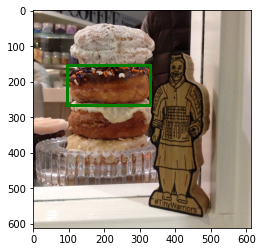

In [12]:
draw_box_gen_text(3)